<a href="https://colab.research.google.com/github/fralfaro/MAT281_2024/blob/main/docs/labs/lab_08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# MAT281 - Laboratorio N°08

<a id='p1'></a>
## I.- Problema 01


<img src="https://www.svgrepo.com/show/253022/car.svg" width = "300" align="center"/>



El conjunto de datos, denominado `vehiculos_procesado_con_grupos.csv`, contiene algunas de las características más importantes de los vehículos. El objetivo de este ejercicio es clasificar los vehículos en diferentes categorías, basándonos en las características que se describen a continuación.

El desafío de este ejercicio radica en la combinación de variables numéricas y categóricas, lo que añade complejidad al análisis.

Lo primero que haremos será cargar el conjunto de datos:

**Descripción de los Datos:**

| **Nombre de la Columna**   | **Descripción**                                                                                                                                   |
|----------------------------|---------------------------------------------------------------------------------------------------------------------------------------------------|
| **year**                   | El año en que el vehículo fue fabricado.                                                                                                          |
| **desplazamiento**          | La capacidad volumétrica del motor en litros. Indica la cantidad de aire y combustible que puede desplazar el motor durante una revolución.       |
| **cilindros**               | El número de cilindros que tiene el motor. Los cilindros son las cámaras donde ocurre la combustión interna en los motores de los vehículos.       |
| **co2**                     | Emisiones de dióxido de carbono del vehículo, medido en gramos por kilómetro. Es una medida de las emisiones de gases de efecto invernadero.       |
| **clase_tipo**              | La clase o tipo de vehículo, como vehículos especiales, deportivos, etc.                                                                         |
| **traccion_tipo**           | Tipo de tracción del vehículo, ya sea tracción en dos ruedas, en cuatro ruedas o en todas las ruedas.                                             |
| **transmision_tipo**        | Tipo de transmisión del vehículo, como automática, manual, entre otros.                                                                          |
| **combustible_tipo**        | Tipo de combustible que utiliza el vehículo, como gasolina, diésel, eléctrico, híbrido, etc.                                                     |
| **tamano_motor_tipo**       | Clasificación del tamaño del motor (por ejemplo, pequeño, mediano o grande), que generalmente se basa en la capacidad de desplazamiento.           |
| **consumo_tipo**            | Clasificación del nivel de consumo de combustible del vehículo, indicando si es alto, bajo, o muy alto.                                           |
| **co2_tipo**                | Clasificación de las emisiones de CO2 del vehículo, indicando si es alto, bajo, o muy alto.                                                       |
| **consumo_litros_milla**    | El consumo de combustible del vehículo, medido en litros por milla. Indica la eficiencia del vehículo en términos de consumo de combustible.        |



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.dummy import DummyClassifier
from sklearn.cluster import KMeans


%matplotlib inline

sns.set_palette("deep", desat=.6)
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [2]:
# cargar datos
df = pd.read_csv("https://raw.githubusercontent.com/fralfaro/MAT281_2024/main/docs/labs/data/vehiculos_procesado_con_grupos.csv", sep=",")\
       .drop(
            ["fabricante",
             "modelo",
             "transmision",
             "traccion",
             "clase",
             "combustible",
             "consumo"],

          axis=1)

df.head()

,year,desplazamiento,cilindros,co2,clase_tipo,traccion_tipo,transmision_tipo,combustible_tipo,tamano_motor_tipo,consumo_tipo,co2_tipo,consumo_litros_milla
0,1984,2.5,4.0,522.764706,Vehículos Especiales,dos,Automatica,Normal,pequeño,alto,alto,0.222671
1,1984,4.2,6.0,683.615385,Vehículos Especiales,dos,Automatica,Normal,grande,muy alto,muy alto,0.291185
2,1985,2.5,4.0,555.437500,Vehículos Especiales,dos,Automatica,Normal,pequeño,alto,alto,0.236588
3,1985,4.2,6.0,683.615385,Vehículos Especiales,dos,Automatica,Normal,grande,muy alto,muy alto,0.291185
4,1987,3.8,6.0,555.437500,Coches Medianos,dos,Automatica,Premium,grande,alto,alto,0.236588


En este caso, no solo se tienen datos numéricos, sino que también categóricos. Además, tenemos problemas de datos **vacíos (Nan)**. Así que para resolver este problema, seguiremos varios pasos:

### 1.- Normalizar datos

1. Cree un conjunto de datos con las variables numéricas, además, para cada dato vacía, rellene con el promedio asociado a esa columna. Finalmente, normalize los datos mediante el procesamiento **MinMaxScaler** de **sklearn**.

2.-  Cree un conjunto de datos con las variables categóricas , además, transforme de variables categoricas a numericas ocupando el comando **get_dummies** de pandas ([referencia](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html)). Explique a grande rasgo como se realiza la codificación de variables numéricas a categóricas.

3.- Junte ambos dataset en uno, llamado **df_procesado**.

In [3]:
# Seleccionar las columnas numéricas
numerical_columns = ['year', 'desplazamiento', 'cilindros', 'co2', 'consumo_litros_milla']

# Rellenar valores faltantes con el promedio de cada columna
df_numerical = df[numerical_columns].fillna(df[numerical_columns].mean())

# Normalizar las columnas numéricas usando MinMaxScaler
scaler = MinMaxScaler()
df_numerical_scaled = pd.DataFrame(scaler.fit_transform(df_numerical), columns=numerical_columns)
df_numerical_scaled.head()

,year,desplazamiento,cilindros,co2,consumo_litros_milla
0,0.000000,0.243590,0.142857,0.398014,0.331027
1,0.000000,0.461538,0.285714,0.527672,0.475113
2,0.029412,0.243590,0.142857,0.424351,0.360294
3,0.029412,0.461538,0.285714,0.527672,0.475113
4,0.088235,0.410256,0.285714,0.424351,0.360294


In [4]:
# Seleccionar las columnas categóricas
categorical_columns = ['clase_tipo', 'traccion_tipo', 'transmision_tipo',
                       'combustible_tipo', 'tamano_motor_tipo',
                       'consumo_tipo', 'co2_tipo']

df_categorical = pd.get_dummies(df[categorical_columns])
df_categorical.head()

,clase_tipo_Camionetas,clase_tipo_Coche Familiar,clase_tipo_Coches Grandes,clase_tipo_Coches Medianos,clase_tipo_Coches pequeños,clase_tipo_Deportivos,clase_tipo_Furgoneta,clase_tipo_Vehículos Especiales,traccion_tipo_cuatro,traccion_tipo_dos,...,consumo_tipo_alto,consumo_tipo_bajo,consumo_tipo_moderado,consumo_tipo_muy alto,consumo_tipo_muy bajo,co2_tipo_alto,co2_tipo_bajo,co2_tipo_moderado,co2_tipo_muy alto,co2_tipo_muy bajo
0,False,False,False,False,False,False,False,True,False,True,...,True,False,False,False,False,True,False,False,False,False
1,False,False,False,False,False,False,False,True,False,True,...,False,False,False,True,False,False,False,False,True,False
2,False,False,False,False,False,False,False,True,False,True,...,True,False,False,False,False,True,False,False,False,False
3,False,False,False,False,False,False,False,True,False,True,...,False,False,False,True,False,False,False,False,True,False
4,False,False,False,True,False,False,False,False,False,True,...,True,False,False,False,False,True,False,False,False,False


Por cada clasificación categórica de las variables se crea una nueva columna que tiene valor 0 o 1 (False or True).

In [5]:
df_procesado = pd.concat([df_numerical_scaled, df_categorical], axis=1)
df_procesado.head()

,year,desplazamiento,cilindros,co2,consumo_litros_milla,clase_tipo_Camionetas,clase_tipo_Coche Familiar,clase_tipo_Coches Grandes,clase_tipo_Coches Medianos,clase_tipo_Coches pequeños,...,consumo_tipo_alto,consumo_tipo_bajo,consumo_tipo_moderado,consumo_tipo_muy alto,consumo_tipo_muy bajo,co2_tipo_alto,co2_tipo_bajo,co2_tipo_moderado,co2_tipo_muy alto,co2_tipo_muy bajo
0,0.000000,0.243590,0.142857,0.398014,0.331027,False,False,False,False,False,...,True,False,False,False,False,True,False,False,False,False
1,0.000000,0.461538,0.285714,0.527672,0.475113,False,False,False,False,False,...,False,False,False,True,False,False,False,False,True,False
2,0.029412,0.243590,0.142857,0.424351,0.360294,False,False,False,False,False,...,True,False,False,False,False,True,False,False,False,False
3,0.029412,0.461538,0.285714,0.527672,0.475113,False,False,False,False,False,...,False,False,False,True,False,False,False,False,True,False
4,0.088235,0.410256,0.285714,0.424351,0.360294,False,False,False,True,False,...,True,False,False,False,False,True,False,False,False,False


### 2.- Realizar ajuste mediante kmeans

Una vez depurado el conjunto de datos, es momento de aplicar el algoritmo de **kmeans**.

1. Ajuste el modelo de **kmeans** sobre el conjunto de datos, con un total de **8 clusters**.
2. Asociar a cada individuo el correspondiente cluster y calcular valor de los centroides de cada cluster.
3. Realizar un resumen de las principales cualidades de cada cluster. Para  esto debe calcular (para cluster) las siguientes medidas de resumen:
    * Valor promedio de las variables numérica
    * Moda para las variables numericas

In [7]:
n_clusters = 8

# Ajustar el modelo de KMeans
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(df_procesado)

# Asignar cluster correspondiente
df_procesado['cluster'] = kmeans.labels_
df_procesado.head()

,year,desplazamiento,cilindros,co2,consumo_litros_milla,clase_tipo_Camionetas,clase_tipo_Coche Familiar,clase_tipo_Coches Grandes,clase_tipo_Coches Medianos,clase_tipo_Coches pequeños,...,consumo_tipo_bajo,consumo_tipo_moderado,consumo_tipo_muy alto,consumo_tipo_muy bajo,co2_tipo_alto,co2_tipo_bajo,co2_tipo_moderado,co2_tipo_muy alto,co2_tipo_muy bajo,cluster
0,0.000000,0.243590,0.142857,0.398014,0.331027,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,0
1,0.000000,0.461538,0.285714,0.527672,0.475113,False,False,False,False,False,...,False,False,True,False,False,False,False,True,False,3
2,0.029412,0.243590,0.142857,0.424351,0.360294,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,0
3,0.029412,0.461538,0.285714,0.527672,0.475113,False,False,False,False,False,...,False,False,True,False,False,False,False,True,False,3
4,0.088235,0.410256,0.285714,0.424351,0.360294,False,False,False,True,False,...,False,False,False,False,True,False,False,False,False,0


In [10]:
# Obtener los centroides de cada cluster
centroides = pd.DataFrame(kmeans.cluster_centers_, columns=df_procesado.columns)
centroides

,year,desplazamiento,cilindros,co2,consumo_litros_milla,clase_tipo_Camionetas,clase_tipo_Coche Familiar,clase_tipo_Coches Grandes,clase_tipo_Coches Medianos,clase_tipo_Coches pequeños,...,consumo_tipo_bajo,consumo_tipo_moderado,consumo_tipo_muy alto,consumo_tipo_muy bajo,co2_tipo_alto,co2_tipo_bajo,co2_tipo_moderado,co2_tipo_muy alto,co2_tipo_muy bajo,cluster
0,0.476203,0.446766,0.325461,0.410605,0.344917,3.053603e-01,0.017575,0.039543,0.048770,0.154657,...,-1.398881e-14,1.186292e-02,8.787346e-04,-6.550316e-15,9.925308e-01,6.590510e-04,-1.160183e-14,6.810193e-03,-1.745826e-14,6.000000e+00
1,0.523869,0.250495,0.195088,0.304375,0.226729,6.144330e-02,0.095395,0.045636,0.153402,0.450172,...,9.806186e-01,-2.603473e-14,-9.048318e-15,1.938144e-02,-8.743006e-15,9.989003e-01,5.498282e-04,7.216450e-15,5.498282e-04,3.000000e+00
2,0.440116,0.361599,0.287553,0.354467,0.281434,8.043324e-02,0.090732,0.128551,0.203125,0.297585,...,3.142756e-02,9.621804e-01,3.551136e-04,5.149148e-03,1.420455e-02,7.102273e-04,9.850852e-01,-1.196265e-14,-8.354428e-15,2.000000e+00
3,0.412004,0.576146,0.420130,0.506937,0.449663,3.338947e-01,0.003789,0.035649,0.038596,0.138667,...,-1.662559e-14,8.982456e-03,9.507368e-01,-6.716849e-15,9.824561e-04,-3.144707e-14,-1.315614e-14,9.990175e-01,1.193490e-14,4.000000e+00
4,0.723894,0.352271,0.282857,0.352779,0.279733,7.904762e-02,0.083810,0.098095,0.121905,0.184286,...,6.333333e-02,9.161905e-01,5.190293e-15,1.952381e-02,4.619048e-02,1.380952e-02,9.304762e-01,1.428571e-03,8.095238e-03,7.000000e+00
5,0.695630,0.178857,0.150271,0.240158,0.156818,1.129652e-14,0.110562,0.027836,0.182362,0.547867,...,-1.265654e-14,2.601457e-04,1.321165e-14,9.997399e-01,1.060263e-14,1.742976e-02,-1.082467e-14,-9.325873e-15,9.825702e-01,1.000000e+00
6,0.438752,0.159481,0.141102,0.242174,0.156452,1.642996e-02,0.125035,0.006405,0.092453,0.710387,...,-1.201816e-14,1.709743e-14,1.254552e-14,1.000000e+00,9.631185e-15,2.784740e-03,-1.043610e-14,-7.077672e-15,9.972153e-01,5.000000e+00
7,0.375242,0.314568,0.244567,0.354655,0.281424,2.039671e-01,0.063997,0.004117,0.080464,0.494012,...,1.646707e-02,9.801647e-01,8.965051e-15,3.368263e-03,2.245509e-02,7.216450e-16,9.775449e-01,4.524159e-15,-1.196265e-14,1.110223e-13


In [11]:
# Seleccionamos solo las columnas numéricas para el promedio
numerical_columns = ['year', 'desplazamiento', 'cilindros', 'co2', 'consumo_litros_milla']

# Calcular el promedio de las variables numéricas por cluster
cluster_summary_mean = df_procesado.groupby('cluster')[numerical_columns].mean()

# Mostrar el promedio por cluster
print("Promedio de las variables numéricas por cluster:")
print(cluster_summary_mean)

Promedio de las variables numéricas por cluster:
             year  desplazamiento  cilindros       co2  consumo_litros_milla
cluster                                                                     
0        0.476203        0.446766   0.325461  0.410605              0.344917
1        0.523869        0.250495   0.195088  0.304375              0.226729
2        0.440116        0.361599   0.287553  0.354467              0.281434
3        0.412004        0.576146   0.420130  0.506937              0.449663
4        0.723894        0.352271   0.282857  0.352779              0.279733
5        0.695630        0.178857   0.150271  0.240158              0.156818
6        0.438752        0.159481   0.141102  0.242174              0.156452
7        0.375242        0.314568   0.244567  0.354655              0.281424


In [12]:
categorical_columns = df_procesado.drop(columns=numerical_columns + ['cluster']).columns

# Calcular la moda de las variables categóricas por cluster
cluster_summary_mode = df_procesado.groupby('cluster')[categorical_columns].agg(lambda x: x.mode().iloc[0])

# Mostrar la moda por cluster
print("Moda de las variables categóricas por cluster:")
print(cluster_summary_mode)

Moda de las variables categóricas por cluster:
         clase_tipo_Camionetas  clase_tipo_Coche Familiar  \
cluster                                                     
0                        False                      False   
1                        False                      False   
2                        False                      False   
3                        False                      False   
4                        False                      False   
5                        False                      False   
6                        False                      False   
7                        False                      False   

         clase_tipo_Coches Grandes  clase_tipo_Coches Medianos  \
cluster                                                          
0                            False                       False   
1                            False                       False   
2                            False                       False   
3           

### 3.- Elegir Número de cluster

Estime mediante la **regla del codo**, el número de cluster apropiados para el caso.
Para efectos prácticos, eliga la siguiente secuencia como número de clusters a comparar:

$$[5, 10, 20, 30, 50, 75, 100, 200, 300]$$

Una vez realizado el gráfico, saque sus propias conclusiones del caso.

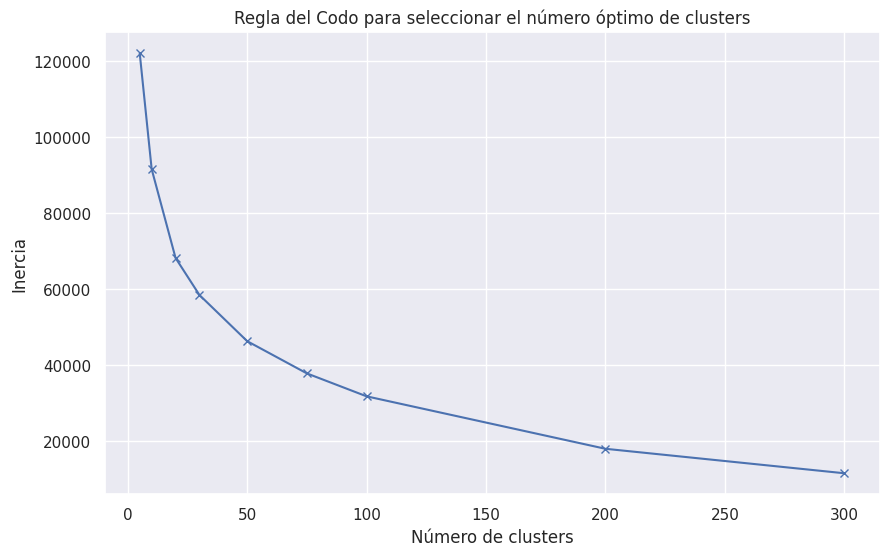

In [13]:
cluster_range = [5, 10, 20, 30, 50, 75, 100, 200, 300]
inertia_values = []

# Calculamos el valor de inercia para cada número de clusters
for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(df_procesado)  # Ajustar KMeans
    inertia_values.append(kmeans.inertia_)  # Guardar el valor de inercia

# Graficar

plt.figure(figsize=(10, 6))
plt.plot(cluster_range, inertia_values, 'bx-')
plt.xlabel('Número de clusters')
plt.ylabel('Inercia')
plt.title('Regla del Codo para seleccionar el número óptimo de clusters')
plt.show()

Al observar el gráfico resultante, se pueden obtener conclusiones sobre el número apropiado de clusters. La regla del codo sugiere elegir el número de clusters donde la reducción en la inercia se estabiliza significativamente. En otras palabras, se busca el punto en el gráfico donde la curva de inercia comienza a aplanarse o forma un codo.

Se puede observar a partir del gráfico que el número óptimo de clusters parece estar alrededor de 50 clusters, ya que a partir de este punto, el gráfico se aplana y el beneficio de agregar más clusters en términos de reducción de inercia disminuye.

## II.- Problema 02

<img src="https://live.staticflickr.com/7866/47075467621_85ab810139_c.jpg" align="center"/>

Para el conjunto de datos de **Iris**, se pide realizar una reducción de dimensionalidad ocupando las técnicas de PCA y TSNE (vistas en clases).



In [14]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

In [15]:
dataset = load_iris()

features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
target = 'species'
iris = pd.DataFrame(
    dataset.data,
    columns=features)

iris['species'] = dataset.target
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


El objetivo es aplicar ambos algoritmos de la siguiente manera:

* Análisis detallado algoritma PCA (tablas, gráficos, etc.)
* Análisis detallado algoritma TSNE (tablas, gráficos, etc.)
* Comparar ambos algoritmos (conclusiones del caso)

### Análisis PSA

In [21]:
from sklearn.preprocessing import StandardScaler

# Estándarizamos las características
scaler = StandardScaler()
iris_scaled = scaler.fit_transform(iris[features])

# Aplicamos PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(iris_scaled)

# Varianza explicada por cada componente
variance = pca.explained_variance_ratio_

# Agregamos los resultados al DataFrame
iris['PCA1'] = pca_result[:, 0]
iris['PCA2'] = pca_result[:, 1]

# Mostramos la varianza explicada
print(f"Varianza explicada por PCA1 y PCA2: {variance}")
iris[['PCA1', 'PCA2', 'species']].head()

Varianza explicada por PCA1 y PCA2: [0.72962445 0.22850762]


,PCA1,PCA2,species
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0
3,-2.299384,-0.597395,0
4,-2.389842,0.646835,0


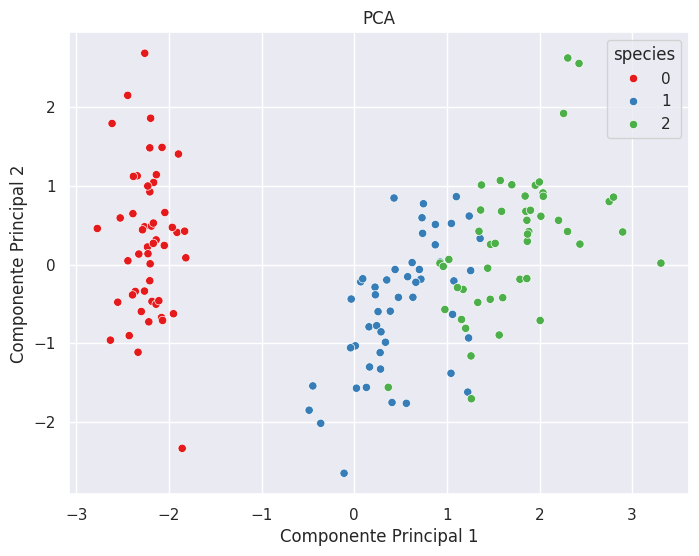

In [22]:
# Graficamos
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='species', data=iris, palette='Set1')
plt.title('PCA')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.show()

In [23]:
pca_total = PCA(n_components=4)
pca_total.fit(iris_scaled)

print(f"Varianza acumulada por cada componente: {pca_total.explained_variance_ratio_.cumsum()}")

Varianza acumulada por cada componente: [0.72962445 0.95813207 0.99482129 1.        ]


### Análisis TSNE

In [25]:
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(iris_scaled)

# Agregamos los resultados de t-SNE al DataFrame
iris['TSNE1'] = tsne_result[:, 0]
iris['TSNE2'] = tsne_result[:, 1]

# Mostramos el resultado de t-SNE
iris[['TSNE1', 'TSNE2', 'species']].head()

,TSNE1,TSNE2,species
0,-26.283514,-0.934040,0
1,-22.458551,-1.582246,0
2,-23.502516,-0.568364,0
3,-22.724354,-0.502646,0
4,-26.786913,-0.364475,0


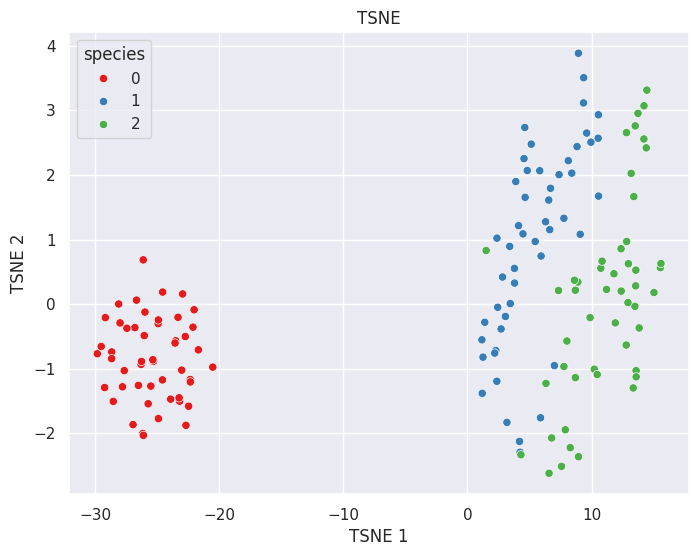

In [26]:
# Graficamos
plt.figure(figsize=(8, 6))
sns.scatterplot(x='TSNE1', y='TSNE2', hue='species', data=iris, palette='Set1')
plt.title('TSNE')
plt.xlabel('TSNE 1')
plt.ylabel('TSNE 2')
plt.show()

### Conclusiones

 El análisis con PCA muestra una buena separación de las especies en los dos primeros componentes principales, especialmente para la especie 0. En cambio TSNE ofrece una separación más marcada entre las especies, los grupos están mucho más diferenciados, especialmente la especie 0, que se observa completamente aislada. Por lo tanto, PCA es más adecuado para una comprensión de la varianza y la estructura global de los datos, mientras que t-SNE es mejor para visualizar la separación local entre grupos.